#Numpy, Matplotlib, and Pandas... Oh My!

#Matplotlib (Plotting)

In [10]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is D851-5801

 Directory of C:\Users\Benjamin\Desktop\python4ds\pandas_numpy_matplotlib

01/09/2016  01:40 PM    <DIR>          .
01/09/2016  01:40 PM    <DIR>          ..
01/09/2016  01:23 PM    <DIR>          .ipynb_checkpoints
01/09/2016  11:14 AM    <DIR>          data
01/09/2016  11:14 AM             5,695 exercise.md
01/09/2016  11:14 AM            28,343 linear_algebra.ipynb
01/09/2016  01:21 PM           235,877 pandas-extra.ipynb
01/09/2016  01:40 PM            62,763 pandas.ipynb
01/09/2016  11:14 AM             3,159 saved_data.csv
01/09/2016  11:14 AM             3,943 Untitled.ipynb
               6 File(s)        339,780 bytes
               4 Dir(s)  480,341,151,744 bytes free


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
x = np.linspace(0,10,100)
x

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36

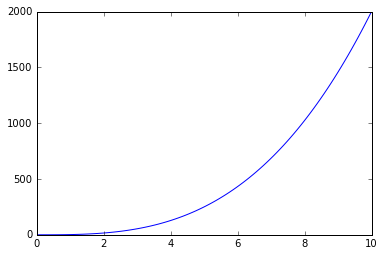

In [13]:
plt.plot(x,2*x**3)

#Pandas (Advanced 'Excel' of data science)

##Series


Think of a Pandas Series as a labeled one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [14]:
from numpy.random import randn
import numpy as np

In [15]:
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
int_series = pd.Series(range(10))
int_series.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [17]:
num_series = pd.Series(randn(10))
num_series.head()

0   -0.290807
1    0.108824
2    0.240077
3    0.165927
4    1.122862
dtype: float64

##Indexes
Notice how each series has an index (in this case a relatively meaningless default index).
Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.
Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.
When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [18]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print indexed_series
print '\n'
print alt_indexed_series

California   -0.752067
Alabama      -0.304653
Indiana       0.423620
Montana      -0.007040
Kentucky      1.547150
dtype: float64


Washington   -0.038044
Alabama       0.220189
Montana       0.643884
Indiana      -0.575411
New York      0.079089
dtype: float64


In [19]:
indexed_series.mean()

0.18140205253370498

In [20]:
#Pandas uses the index by default to align series for arithmetic!
result = indexed_series + alt_indexed_series
print result
print result.fillna(np.mean(result))

Alabama      -0.084464
California         NaN
Indiana      -0.151790
Kentucky           NaN
Montana       0.636844
New York           NaN
Washington         NaN
dtype: float64
Alabama      -0.084464
California    0.133530
Indiana      -0.151790
Kentucky      0.133530
Montana       0.636844
New York      0.133530
Washington    0.133530
dtype: float64


In [21]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='1 m')

In [22]:
dt_index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

##DataFrames
Data frames extend the concept of Series to table-like data.

In [23]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df.tail()

a         b         c         d         e
2015-06-30 -0.932744  0.212529 -0.205503 -0.641101  0.470490
2015-07-31 -0.930087  3.148896 -1.223330  0.570225  0.538828
2015-08-31  0.007095  0.267745  0.945187 -0.670976  0.264264
2015-09-30  1.204609  0.455194 -0.229599 -0.332132  0.123681
2015-10-31  0.445816 -0.274158 -0.356978  0.133474 -0.343268

In [24]:
#A dataframes columns are series:
col = df.a
type(col)

pandas.core.series.Series

In [25]:
df['a']

2015-01-31   -0.396406
2015-02-28    1.367540
2015-03-31    0.716079
2015-04-30   -2.448175
2015-05-31   -0.028945
2015-06-30   -0.932744
2015-07-31   -0.930087
2015-08-31    0.007095
2015-09-30    1.204609
2015-10-31    0.445816
Freq: M, Name: a, dtype: float64

In [26]:
#New column
df['new'] = df['a'] + df['b']
df

a         b         c         d         e       new
2015-01-31 -0.396406  1.455351 -0.432324  0.032238  0.746117  1.058945
2015-02-28  1.367540 -1.154100  1.784816  1.404164 -0.712029  0.213440
2015-03-31  0.716079 -0.027333 -0.003922  0.753386  0.972523  0.688746
2015-04-30 -2.448175 -0.859196 -1.747351 -0.908980 -0.480153 -3.307371
2015-05-31 -0.028945  1.250815 -1.043682  2.230718  0.818569  1.221869
2015-06-30 -0.932744  0.212529 -0.205503 -0.641101  0.470490 -0.720215
2015-07-31 -0.930087  3.148896 -1.223330  0.570225  0.538828  2.218809
2015-08-31  0.007095  0.267745  0.945187 -0.670976  0.264264  0.274840
2015-09-30  1.204609  0.455194 -0.229599 -0.332132  0.123681  1.659803
2015-10-31  0.445816 -0.274158 -0.356978  0.133474 -0.343268  0.171658

In [27]:
#Delete a column
df.drop('new', axis=1, inplace = True)

In [28]:
df[df.index == '2015-01-31']

a         b         c         d         e
2015-01-31 -0.396406  1.455351 -0.432324  0.032238  0.746117

In [29]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

         Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play


In [38]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
df.head()

Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
df.describe()

Temperature   Humidity     Windy
count    14.000000  14.000000        14
mean     73.571429  80.285714  0.428571
std       6.571667   9.840486  0.513553
min      64.000000  65.000000     False
25%      69.250000  71.250000         0
50%      72.000000  80.000000         0
75%      78.750000  88.750000         1
max      85.000000  96.000000      True

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 6 columns):
Date           14 non-null object
Outlook        14 non-null object
Temperature    14 non-null int64
Humidity       14 non-null int64
Windy          14 non-null bool
Result         14 non-null object
dtypes: bool(1), int64(2), object(3)
memory usage: 686.0+ bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11307ead0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1132d3dd0>]], dtype=object)

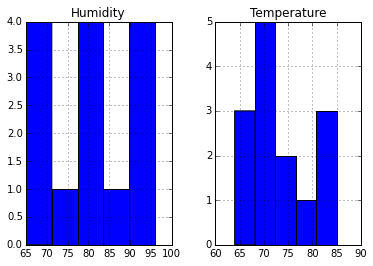

In [95]:
df.hist(['Temperature','Humidity'],bins=5)

/Users/scott/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


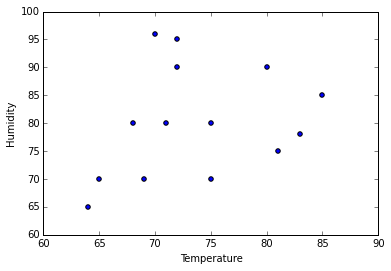

In [93]:
df.plot('Temperature', 'Humidity', kind='scatter')

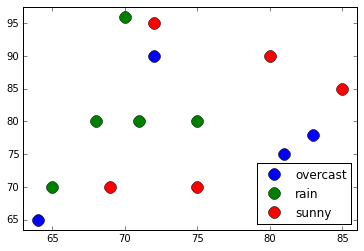

In [94]:
#for color

groups=df.groupby('Outlook')

fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()